# Reinforcement Learning based Virtual Screening
Protein-Ligan pose prediction using RL

## Spatial block arrangement using RL CNN-DQN
__Input__
- Sandbox with block and the surface placemnt

__Output__
- <x, y, $\theta$> for block wrt Sandbox

In [1]:
from block_world.env import Env
from agents.ddpg_agent import DDPGAgent
from matplotlib import pyplot as plt
import numpy as np

/Users/in-justin.jose/.miniconda/envs/rl-virtual-screening/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/in-justin.jose/.miniconda/envs/rl-virtual-screening/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/in-justin.jose/.miniconda/envs/rl-virtual-screening/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([

### Generating the sandbox
The block world generates a block and places it in the surface by randomizing <x, y, $\theta$>. The $\theta$ rotated block is stored in the _block_ property of the Block class.

Both the block and the surface are combined together into a single sandbox image. (More here)

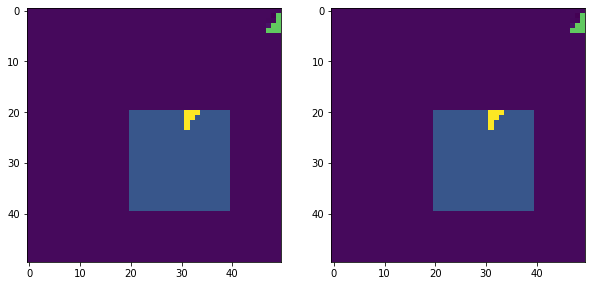

In [2]:
env = Env()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 20))
ax1.imshow(env.block.sandbox)
ax2.imshow(env.block.original_sandbox)
plt.show()

In [3]:
print(env.block.rotate_angle, env.block.shift_x, env.block.shift_y)

-178 20 31


disti 55.685513960565935


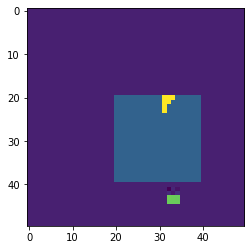

0.01795799174464218 [ -9.54120064 -14.81362729 -54.46468699] (2, 3)


In [4]:
xx = env.action_space.sample()
env.block.block_x
state, reward, t = env.step(xx)
plt.imshow(env.block.sandbox)
plt.show()
print(reward, xx, env.action_space.action_bounds.shape)

In [5]:
block = env.block
print(env.block.block_x, env.block.block_y, block.shift_x, block.shift_y, [block.shift_x- block.block_x, block.shift_y - block.block_y, block.rotate_angle])

-9 32 20 31 [29, -1, -123.53531300669594]


### Absolute Fit
The absolute fit is when the block is placed square on top of the slot.


  [block.shift_x- block.block_x, block.shift_y - block.block_y, block.rotate_angle]


In [6]:
1/258.1212617550832

0.003874148116278945

disti 0.00643882214284777
99999.0 [28.99, -1.01, -123.54531300669595] (2, 3)


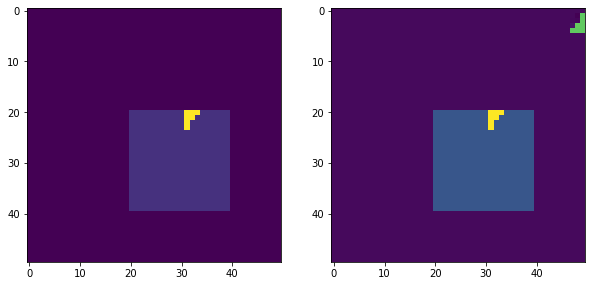

In [7]:
block = env.block
xx = [block.shift_x- block.block_x - 0.01, block.shift_y - block.block_y - 0.01, block.rotate_angle - 0.01]
state, reward, t = env.step(xx)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 20))
ax1.imshow(env.block.sandbox)
ax2.imshow(env.block.original_sandbox)
print(reward, xx, env.action_space.action_bounds.shape)

### Converting sandbox image to tensors for CNN consumption
The sandbox image needs to be converted into an image consumable by the CNN

In [10]:
agent = DDPGAgent(env)

In [ ]:
actions =  agent.play(100)

Actiual states:  23 32 35
disti 25.238595337433274
True [-3.28536047 -4.5728328   8.44845225] 0.03962185639217505 1
disti 18.90314355985087
True [-3.9175624  -3.17567475  4.95855088] 0.052901254060406085 2
disti 13.094748904669434
True [-1.97624176 -3.97416381  7.19713744] 0.07636648913851352 3
disti 10.60921043317191
True [-3.87430336 -4.63764206  9.88212442] 100.09425772127898 4
disti 16.16046182858461
True [-2.28915397 -2.08233479 10.49108538] 100.06187941969772 5
disti 25.22306499832702
True [-3.04716676 -4.1515649  14.01407812] 100.03964625235142 6
disti 33.06402105653646
True [-3.26290453 -5.68472944 10.55951621] 0.030244355285465468 7
disti 37.3862212407909
True [-3.6720415  -4.08734849  8.85974512] 0.026747822240695784 8
disti 40.254388217953974
True [-4.06796451 -2.80406394  8.65239271] 0.024842012120159043 9
disti 41.429308873822585
True [-4.18127019 -3.22777371  5.3678861 ] 0.024137501377240144 10
disti 40.26522384322356
True [-4.32305347 -1.10452351  2.77647396] 0.024835326

True [-3.88470155 -4.17842177  4.67289073] -0.1 177
True [-3.66183449 -4.39783099  3.61038407] -0.1 178
True [-3.29839576 -4.31097586  3.8324712 ] -0.1 179
True [-3.07497789 -4.56868093  3.50733006] -0.1 180
True [-3.26808516 -4.89795356  4.21734099] -0.1 181
True [-3.28332054 -4.62479728  5.69803963] -0.1 182
True [-3.0943699  -4.55167772  7.74167751] -0.1 183
True [-3.13727395 -4.63542317  6.86495545] -0.1 184
True [-3.11634976 -4.86527842  7.20940047] -0.1 185
True [-3.10956795 -4.86224163  6.94899795] -0.1 186
True [-2.82454707 -4.67055814  5.69219176] -0.1 187
True [-2.71159091 -4.87273576  5.43707058] -0.1 188
True [-3.03312565 -5.15962953  6.62055349] -0.1 189
True [-2.89732486 -4.68794027  7.18288386] -0.1 190
True [-2.50981904 -4.84288168  6.63663293] -0.1 191
True [-2.56172958 -4.76863534  7.65783264] -0.1 192
True [-3.09406605 -4.87628716  7.33845738] -0.1 193
True [-3.20252115 -5.25597826  7.4393161 ] -0.1 194
True [-3.15093174 -5.21572484  7.28054179] -0.1 195
True [-3.246

True [ 3.0414978  -9.83683343 15.79323591] -0.1 335
True [ 2.61593968 -9.74111186 15.82156066] -0.1 336
True [ 2.58142871 -9.8372166  15.66826104] -0.1 337
True [  3.0818151  -10.02717625  14.59173739] -0.1 338
True [  2.96341301 -10.09920725  14.54977001] -0.1 339
True [ 2.9291391  -9.87543256 14.37015792] -0.1 340
True [  3.05128415 -10.44344371  15.17167916] -0.1 341
True [  3.08089991 -11.13823872  15.53886739] -0.1 342
True [  3.200719   -10.70107226  15.28465887] -0.1 343
True [  3.03532987 -10.90697316  13.3199553 ] -0.1 344
True [  3.18646623 -11.09769586  14.26052887] -0.1 345
True [  3.18498462 -10.91706906  14.36220475] -0.1 346
True [  2.99540566 -10.90707873  14.86137301] -0.1 347
True [  3.02630731 -11.28085441  15.26949482] -0.1 348
True [  2.9828873  -10.97994976  15.49892169] -0.1 349
True [  2.41615277 -10.92554664  14.99583362] -0.1 350
True [  2.61920595 -10.95625383  16.2485643 ] -0.1 351
True [  2.6425384  -10.94707333  15.32446415] -0.1 352
True [  3.00189848 -10

Epoch 1/20
22/32 [===================>..........] - ETA: 0s - loss: -2.0305 - acc: 0.0000e+00

In [ ]:
env = agent.env
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 20))
ax1.imshow(env.block.sandbox)
ax2.imshow(env.block.original_sandbox)
plt.show()